## Input Libraries

In [1]:
import pandas as pd
import time
import numpy as np
from eunjeon import Mecab

In [2]:
mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic')

In [4]:
start = time.time()

content = list(df['Content'])
nouns = []

for s in content:
    noun = mecab.nouns(s)
    nouns.append(noun)
len(nouns)

print(time.time() - start)

#전체 명사들 모음
all_nouns = []
for i in range(len(nouns)):
    all_nouns.extend(nouns[i])
all_nouns = set(all_nouns) #겹치는 것들 삭제
all_nouns = list(all_nouns) #겹치지 않은 유일한 명사 리스트

4.208716630935669


In [18]:
# 이미 형태소 분석해서 추가했던 걸 가지고 왔음
df = pd.read_excel("건설20200401_20200401.xlsx")
df

,Date,Title,Content,nouns
0,2021.04.01,자녀와 함께 '수상한 매입'…3기 신도시 땅 곳곳 '탈세 흔적',[앵커]신도시 투기 의혹과 관련해 국세청도 움직였습니다. 3기 신도시 6곳을 조사했...,"['앵커', '도시', '투기', '의혹', '관련', '국세청', '도시', '곳..."
1,2021.04.01,"전 현대건설 법무실장 김대근, 부동산개발회사 보성산업 대표로",종합부동산개발기업 보성산업이 현대건설 출신의 전 송도랜드마크시티 김대근 대표이사를 ...,"['종합', '부동산', '개발', '기업', '보성', '산업', '현대', '건..."
2,2021.03.31,롯데 신동빈 회장 2020년 급여 8개 회사서 150억원,신동빈 롯데그룹 회장. 중앙포토 신동빈 롯데그룹 회장이 지난해 롯데지주와 7개 ...,"['신동빈', '롯데', '그룹', '회장', '중앙', '포토', '신동빈', '..."
3,2021.03.31,"""잠재적 범죄자 취급 하나""…하위직 공무원 반발 확산",[앵커]정부가 이틀 전 부동산 투기 방지 대책을 내놓으면서 기존 4급 이상 고위 공...,"['앵커', '정부', '이틀', '전', '부동산', '투기', '방지', '대책..."
4,2021.03.31,"SK E&S;, 호주 바다 탐사 9년만에 LNG 캔다",SK E&S;가 1조6000억여원을 투자해 생산에 착수하는 호주 북부 가스전. [사...,"['조', '억', '원', '투자', '생산', '착수', '호주', '북부', ..."
...,...,...,...,...
1555,2020.04.07,"수·용·성 꺾이니 송도가 뛴다, 4억대 집 한달새 7억에 팔려",인천 송도국제도시 전경. [사진 인천경제자유구역청] 신종 코로나바이러스 감염증(...,"['인천', '송도', '국제', '도시', '전경', '사진', '인천', '경제..."
1556,2020.04.06,"“6000억 적자, 탈원전 무관” 정부·한수원 논리개발 회의했다",정부가 탈(脫)원전 정책으로 인해 한국수력원자력에 큰 손실이 났다는 비판을 막기 위...,"['정부', '탈', '원전', '정책', '한국', '수력', '원자력', '손실..."
1557,2020.04.06,원종역 개통 효과 기대…중소형 후분양 아파트 눈길,경기도 부천시 원종동에서 분양하는 원종 길성그랑프리텔. 경기도 부천시 오정구 원...,"['경기도', '부천시', '원종동', '분양', '원종', '길', '그랑프리',..."
1558,2020.04.06,"‘수‧용‧성’ 꺾이니 송도 뛴다…두달새 2억 껑충, 청약 543대 1",인천 송도국제도시 전경. [사진 인천경제자유구역청] ‘수‧용‧성’(수...,"['인천', '송도', '국제', '도시', '전경', '사진', '인천', '경제..."


In [8]:
start = time.time() #시작
word_frequency = []
for k in range(len(all_nouns)): #전체 유일명사들
    word_f = 0
    for i in range(len(nouns)): #전체 기사들 훑기
        if all_nouns[k] in nouns[i]: #만일 유일 단어 x가 특정 기사 내에 포함되면
            word_f += 1
    word_frequency.append(word_f) #각 유일단어들의 빈도수를 word_frequency list에 저장

print(time.time() - start)

257.0962166786194


In [9]:
#빈도수 평균 계산 위해 시리즈
frequency = pd.Series(word_frequency)
mean = frequency.mean() #전체 단어 빈도수의 평균

In [19]:
df['nouns'] = nouns #기사 데이터에 체언 열 생성

In [11]:
#단어와 그 빈도수 확인 위해 튜플 형태로 리스트에 저장
word_n_frequency = [] 
for i in range(len(all_nouns)):
    x = (all_nouns[i], word_frequency[i])
    word_n_frequency.append(x)

In [12]:
#빈도수 평균이 mean일 때 그 mean보다 큰 단어들이 1차 감성사전 후보 단어
candidate_word = []
for i in range(len(word_n_frequency)):
    if word_n_frequency[i][1] >= mean:
        candidate_word.append(word_n_frequency[i])

In [13]:
candidate_word

[('시흥', 20),
 ('예고', 60),
 ('재산세', 22),
 ('환수', 38),
 ('대학교', 26),
 ('노동자', 59),
 ('적자', 91),
 ('의회', 19),
 ('약식', 25),
 ('만일', 14),
 ('신재', 55),
 ('긴급', 66),
 ('우호', 26),
 ('실업자', 23),
 ('조짐', 21),
 ('개통', 60),
 ('블룸버그', 26),
 ('김경진', 32),
 ('연장', 65),
 ('장남', 19),
 ('안장', 31),
 ('시중', 38),
 ('체인', 16),
 ('수혜', 21),
 ('얼굴', 14),
 ('매각', 105),
 ('논의', 159),
 ('생애', 24),
 ('국책', 23),
 ('네트워크', 51),
 ('밸리', 19),
 ('진정', 32),
 ('상한', 70),
 ('유족', 17),
 ('유형', 36),
 ('라이프', 33),
 ('자동차', 254),
 ('소규모', 25),
 ('해양', 38),
 ('디스플레이', 27),
 ('교통', 169),
 ('세', 180),
 ('텍', 23),
 ('이래', 57),
 ('법무법인', 21),
 ('에프', 16),
 ('현재', 226),
 ('공헌', 18),
 ('하늘', 31),
 ('수준', 405),
 ('초저', 14),
 ('고용부', 28),
 ('저축', 22),
 ('표현', 53),
 ('문병주', 14),
 ('공실', 19),
 ('과세', 38),
 ('문제점', 38),
 ('열기', 21),
 ('방역', 63),
 ('숙제', 32),
 ('급여', 41),
 ('제자리', 14),
 ('정식', 21),
 ('경쟁', 174),
 ('로직스', 15),
 ('추천', 34),
 ('집값', 162),
 ('주차', 25),
 ('가격', 311),
 ('화장실', 14),
 ('정리', 65),
 ('구입', 31),
 ('모바일', 37),
 ('익명'

In [14]:
df2 = pd.read_csv("117700.csv", encoding='euc-kr')
df2 = df2.set_index('날짜')

#아래의 작업을 해준 이유는 21년 4월 2일은 1일로부터 주가가 상승해서 1인데
#NSP(j)는 결국 이 기사가 떠서 그 다음날에 주가가 올랐다면 1을 주는거기때문에
#그 다음날 등락여부를 모르는 4월2일에는 결측치를 주고, 4월 1일부터 등락 라벨링이 가능함
#근데 처음에 데이터 정리할 때 어제보다 오늘 올랐다면 1을 주는 식으로 해놔서 한 번 수정했음
x = list(df2['등락'])
del x[-1]
x.insert(0, np.nan)
df2.drop('등락', axis=1)
df2['등락'] = x

In [22]:
df.set_index(df['Date'], inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df

,Title,Content,nouns
Date,,,
2021.04.01,자녀와 함께 '수상한 매입'…3기 신도시 땅 곳곳 '탈세 흔적',[앵커]신도시 투기 의혹과 관련해 국세청도 움직였습니다. 3기 신도시 6곳을 조사했...,"[앵커, 도시, 투기, 의혹, 관련, 국세청, 도시, 곳, 조사, 여기저기, 탈세,..."
2021.04.01,"전 현대건설 법무실장 김대근, 부동산개발회사 보성산업 대표로",종합부동산개발기업 보성산업이 현대건설 출신의 전 송도랜드마크시티 김대근 대표이사를 ...,"[종합, 부동산, 개발, 기업, 보성, 산업, 현대, 건설, 출신, 송도, 랜드마크..."
2021.03.31,롯데 신동빈 회장 2020년 급여 8개 회사서 150억원,신동빈 롯데그룹 회장. 중앙포토 신동빈 롯데그룹 회장이 지난해 롯데지주와 7개 ...,"[신동빈, 롯데, 그룹, 회장, 중앙, 포토, 신동빈, 롯데, 그룹, 회장, 지난해..."
2021.03.31,"""잠재적 범죄자 취급 하나""…하위직 공무원 반발 확산",[앵커]정부가 이틀 전 부동산 투기 방지 대책을 내놓으면서 기존 4급 이상 고위 공...,"[앵커, 정부, 이틀, 전, 부동산, 투기, 방지, 대책, 기존, 급, 이상, 고위..."
2021.03.31,"SK E&S;, 호주 바다 탐사 9년만에 LNG 캔다",SK E&S;가 1조6000억여원을 투자해 생산에 착수하는 호주 북부 가스전. [사...,"[조, 억, 원, 투자, 생산, 착수, 호주, 북부, 가스전, 사진, 조, 억, 원..."
...,...,...,...
2020.04.07,"수·용·성 꺾이니 송도가 뛴다, 4억대 집 한달새 7억에 팔려",인천 송도국제도시 전경. [사진 인천경제자유구역청] 신종 코로나바이러스 감염증(...,"[인천, 송도, 국제, 도시, 전경, 사진, 인천, 경제자유구역, 청, 신종, 코로..."
2020.04.06,"“6000억 적자, 탈원전 무관” 정부·한수원 논리개발 회의했다",정부가 탈(脫)원전 정책으로 인해 한국수력원자력에 큰 손실이 났다는 비판을 막기 위...,"[정부, 탈, 원전, 정책, 한국, 수력, 원자력, 손실, 비판, 대책, 회의, 것..."
2020.04.06,원종역 개통 효과 기대…중소형 후분양 아파트 눈길,경기도 부천시 원종동에서 분양하는 원종 길성그랑프리텔. 경기도 부천시 오정구 원...,"[경기도, 부천시, 원종동, 분양, 원종, 길, 그랑프리, 텔, 경기도, 부천시, ..."


In [23]:
#[날짜, 제목, 기사, 형태소분석결과, 그 익일의 주가 등락]을 columns로 갖는 total dataframe
total = pd.merge(df, df2['등락'], how='outer', left_index=True, right_index=True)
total.dropna(inplace=True) #ETF 데이터가 뉴스기사보다 더 많아서 
total = total.sort_index(ascending=False) #최근 날짜부터 보려고
total

,Title,Content,nouns,등락
2021.04.01,"전 현대건설 법무실장 김대근, 부동산개발회사 보성산업 대표로",종합부동산개발기업 보성산업이 현대건설 출신의 전 송도랜드마크시티 김대근 대표이사를 ...,"[종합, 부동산, 개발, 기업, 보성, 산업, 현대, 건설, 출신, 송도, 랜드마크...",1.0
2021.04.01,자녀와 함께 '수상한 매입'…3기 신도시 땅 곳곳 '탈세 흔적',[앵커]신도시 투기 의혹과 관련해 국세청도 움직였습니다. 3기 신도시 6곳을 조사했...,"[앵커, 도시, 투기, 의혹, 관련, 국세청, 도시, 곳, 조사, 여기저기, 탈세,...",1.0
2021.03.31,"[경제 브리핑] 예보, 캄코시티 1심 소송서 승소",예금보험공사는 캄보디아 법원에서 진행한 캄코시티 주식 의결권 회복 소송(1심 재판)...,"[예금보험공사, 캄보디아, 법원, 진행, 캄코, 시티, 주식, 의결권, 회복, 소송...",0.0
2021.03.31,"검단신도시에 1180가구…모든 세대 남향, 단지 옆엔 계양천",우미린 파크뷰 우미건설이 인천에서 ‘검단신도시 우미린 파크뷰’(조감도)를 분양한...,"[미린, 파크뷰, 우미건설, 인천, 검단, 도시, 우, 미린, 파크뷰, 조감도, 분...",0.0
2021.03.31,[경제 브리핑] 현대건설·메가박스 업무협약,현대건설은 멀티플렉스 메가박스와 문화 분야 주거 서비스 개발·제휴를 위한 업무협약(...,"[현대건설, 멀티플렉스, 메가, 박스, 문화, 분야, 주거, 서비스, 개발, 제휴,...",0.0
...,...,...,...,...
2020.04.07,"‘6134억 적자, 탈원전 무관’ 논리 만들기, 정부·한수원 회의했다",정부가 2018년 한국수력원자력의 대규모 손실을 탈원전이 아닌 다른 이유로 돌리기 ...,"[정부, 년, 한국, 수력, 원자력, 규모, 손실, 원전, 이유, 대책, 회의, 것...",1.0
2020.04.07,일자리 2500개 물류센터···“제조업 아니라서” 4년 허송세월,#쿠팡은 지난해 말 대구 국가산업단지(이하 국가산단) 부지에서 초대형 물류센터 착공...,"[쿠팡, 지난해, 말, 대구, 국가, 산업단지, 이하, 국가, 산단, 부지, 대형,...",1.0
2020.04.06,"‘수‧용‧성’ 꺾이니 송도 뛴다…두달새 2억 껑충, 청약 543대 1",인천 송도국제도시 전경. [사진 인천경제자유구역청] ‘수‧용‧성’(수...,"[인천, 송도, 국제, 도시, 전경, 사진, 인천, 경제자유구역, 청, 수, 용, ...",1.0
2020.04.06,원종역 개통 효과 기대…중소형 후분양 아파트 눈길,경기도 부천시 원종동에서 분양하는 원종 길성그랑프리텔. 경기도 부천시 오정구 원...,"[경기도, 부천시, 원종동, 분양, 원종, 길, 그랑프리, 텔, 경기도, 부천시, ...",1.0


In [25]:
start = time.time()
#감성사전 후보 단어에 한해서 진행
positive_i = [] #전체 긍정값 리스트
for i in range(len(candidate_word)):
    positive = 0 #긍정값 초기화
    for k in range(len(total)):
        if candidate_word[i][0] in total['nouns'][k]: #만일 단어 i가 기사 k에 있다면
            word_ij = 1 
        else:
            word_ij = 0 
        
        word_NSP = word_ij * total['등락'][k]
        
        positive += word_NSP #기사 전체에 대해 단어 i의 긍정값 누적 sum
        
    positive_i.append(positive)
        
print(time.time() - start)

68.7273108959198


In [26]:
P_i = []
for i in range(len(positive_i)):
    p_i = positive_i[i] / candidate_word[i][1]
    P_i.append(p_i)

In [27]:
sent_dic = []
for i in range(len(P_i)):
    sent = (candidate_word[i][0], P_i[i])
    sent_dic.append(sent)
    
sent_dic

[('시흥', 0.7),
 ('예고', 0.48333333333333334),
 ('재산세', 0.45454545454545453),
 ('환수', 0.631578947368421),
 ('대학교', 0.4230769230769231),
 ('노동자', 0.4915254237288136),
 ('적자', 0.46153846153846156),
 ('의회', 0.21052631578947367),
 ('약식', 0.44),
 ('만일', 0.5714285714285714),
 ('신재', 0.4727272727272727),
 ('긴급', 0.5454545454545454),
 ('우호', 0.5384615384615384),
 ('실업자', 0.30434782608695654),
 ('조짐', 0.47619047619047616),
 ('개통', 0.5166666666666667),
 ('블룸버그', 0.5),
 ('김경진', 0.34375),
 ('연장', 0.6307692307692307),
 ('장남', 0.2631578947368421),
 ('안장', 0.3548387096774194),
 ('시중', 0.5789473684210527),
 ('체인', 0.5),
 ('수혜', 0.47619047619047616),
 ('얼굴', 0.2857142857142857),
 ('매각', 0.5333333333333333),
 ('논의', 0.4591194968553459),
 ('생애', 0.5),
 ('국책', 0.43478260869565216),
 ('네트워크', 0.45098039215686275),
 ('밸리', 0.3684210526315789),
 ('진정', 0.53125),
 ('상한', 0.4),
 ('유족', 0.35294117647058826),
 ('유형', 0.4722222222222222),
 ('라이프', 0.42424242424242425),
 ('자동차', 0.4094488188976378),
 ('소규모', 0.56),
 

In [31]:
sent_dic = pd.DataFrame(sent_dic)
sent_dic.columns=['단어', '긍정지수']
sent_dic = sent_dic.sort_values(by='긍정지수', ascending=False)
sent_dic

,단어,긍정지수
1968,차입,0.866667
55,공실,0.842105
2203,구청장,0.812500
2657,해체,0.800000
50,초저,0.785714
...,...,...
825,패널,0.176471
2692,보존,0.166667
139,모터스,0.166667
3101,브,0.150000


In [32]:
#감성사전을 갖고 있다면 이를 활용해 예측해야지
# 기사 i의 긍정지수: 
# 기사 i에 감성 사전 내 단어가 들어간 개수 sum_j match(i,j)
# match(i,j) * P(j) = 그 기사에 들어간 감성 사전 단어들에 대한 긍정값을 더해줌

#첫 번째 기사에 대해서
result = []
result_p = []
for k in range(len(total)):
    res = 0
    res_p = 0
    for i in range(len(sent_dic)): #감성사전 내에 대해
        if sent_dic['단어'][i] in total['nouns'][k]:
            res += 1
            res_p += sent_dic['긍정지수'][i]
    result.append(res)
    result_p.append(res_p)
        
        
print(result) #빈도수
print(result_p) #긍정값

[60, 130, 27, 86, 34, 91, 132, 34, 95, 104, 91, 126, 110, 173, 174, 247, 109, 195, 154, 106, 110, 24, 85, 120, 121, 67, 155, 89, 129, 233, 162, 25, 70, 149, 159, 81, 106, 146, 94, 119, 83, 166, 142, 125, 155, 29, 151, 123, 77, 98, 204, 215, 182, 97, 183, 131, 185, 112, 164, 126, 246, 185, 207, 234, 213, 198, 105, 126, 210, 177, 234, 221, 113, 210, 123, 177, 103, 156, 189, 83, 156, 102, 117, 240, 21, 129, 19, 174, 101, 152, 129, 90, 21, 74, 175, 128, 165, 135, 127, 141, 191, 71, 186, 121, 93, 133, 146, 151, 181, 177, 200, 88, 155, 149, 27, 139, 214, 168, 124, 64, 147, 94, 185, 183, 82, 148, 143, 162, 229, 226, 160, 57, 114, 92, 167, 140, 163, 77, 137, 231, 127, 135, 162, 86, 161, 186, 139, 224, 75, 151, 148, 73, 121, 132, 135, 175, 215, 89, 169, 166, 235, 101, 483, 124, 112, 90, 88, 229, 244, 182, 89, 120, 174, 127, 128, 135, 167, 80, 138, 142, 192, 157, 101, 66, 170, 143, 189, 180, 146, 189, 98, 112, 216, 86, 505, 113, 157, 168, 93, 88, 108, 308, 165, 160, 108, 36, 121, 141, 78, 184, 1

In [33]:
total['기사빈도수'] = result
total['기사긍정지수'] = result_p
total

,Title,Content,nouns,등락,기사빈도수,기사긍정지수
2021.04.01,"전 현대건설 법무실장 김대근, 부동산개발회사 보성산업 대표로",종합부동산개발기업 보성산업이 현대건설 출신의 전 송도랜드마크시티 김대근 대표이사를 ...,"[종합, 부동산, 개발, 기업, 보성, 산업, 현대, 건설, 출신, 송도, 랜드마크...",1.0,60,30.761469
2021.04.01,자녀와 함께 '수상한 매입'…3기 신도시 땅 곳곳 '탈세 흔적',[앵커]신도시 투기 의혹과 관련해 국세청도 움직였습니다. 3기 신도시 6곳을 조사했...,"[앵커, 도시, 투기, 의혹, 관련, 국세청, 도시, 곳, 조사, 여기저기, 탈세,...",1.0,130,65.649287
2021.03.31,"[경제 브리핑] 예보, 캄코시티 1심 소송서 승소",예금보험공사는 캄보디아 법원에서 진행한 캄코시티 주식 의결권 회복 소송(1심 재판)...,"[예금보험공사, 캄보디아, 법원, 진행, 캄코, 시티, 주식, 의결권, 회복, 소송...",0.0,27,12.720334
2021.03.31,"검단신도시에 1180가구…모든 세대 남향, 단지 옆엔 계양천",우미린 파크뷰 우미건설이 인천에서 ‘검단신도시 우미린 파크뷰’(조감도)를 분양한...,"[미린, 파크뷰, 우미건설, 인천, 검단, 도시, 우, 미린, 파크뷰, 조감도, 분...",0.0,86,43.385909
2021.03.31,[경제 브리핑] 현대건설·메가박스 업무협약,현대건설은 멀티플렉스 메가박스와 문화 분야 주거 서비스 개발·제휴를 위한 업무협약(...,"[현대건설, 멀티플렉스, 메가, 박스, 문화, 분야, 주거, 서비스, 개발, 제휴,...",0.0,34,16.069132
...,...,...,...,...,...,...
2020.04.07,"‘6134억 적자, 탈원전 무관’ 논리 만들기, 정부·한수원 회의했다",정부가 2018년 한국수력원자력의 대규모 손실을 탈원전이 아닌 다른 이유로 돌리기 ...,"[정부, 년, 한국, 수력, 원자력, 규모, 손실, 원전, 이유, 대책, 회의, 것...",1.0,116,59.441620
2020.04.07,일자리 2500개 물류센터···“제조업 아니라서” 4년 허송세월,#쿠팡은 지난해 말 대구 국가산업단지(이하 국가산단) 부지에서 초대형 물류센터 착공...,"[쿠팡, 지난해, 말, 대구, 국가, 산업단지, 이하, 국가, 산단, 부지, 대형,...",1.0,325,158.805530
2020.04.06,"‘수‧용‧성’ 꺾이니 송도 뛴다…두달새 2억 껑충, 청약 543대 1",인천 송도국제도시 전경. [사진 인천경제자유구역청] ‘수‧용‧성’(수...,"[인천, 송도, 국제, 도시, 전경, 사진, 인천, 경제자유구역, 청, 수, 용, ...",1.0,224,112.318546
2020.04.06,원종역 개통 효과 기대…중소형 후분양 아파트 눈길,경기도 부천시 원종동에서 분양하는 원종 길성그랑프리텔. 경기도 부천시 오정구 원...,"[경기도, 부천시, 원종동, 분양, 원종, 길, 그랑프리, 텔, 경기도, 부천시, ...",1.0,61,30.971807


In [36]:
article_p = total['기사긍정지수'].groupby(total.index).mean().sort_index(ascending=False)

In [37]:
article_f = total['기사빈도수'].groupby(total.index).mean().sort_index(ascending=False)

In [38]:
article = pd.concat([article_p, article_f], axis=1)

In [39]:
article

,기사긍정지수,기사빈도수
2021.04.01,48.205378,95.000000
2021.03.31,32.918116,67.333333
2021.03.30,61.329135,124.714286
2021.03.29,88.666896,183.666667
2021.03.26,46.782914,95.800000
...,...,...
2020.04.10,58.084619,118.000000
2020.04.09,71.689588,145.375000
2020.04.08,101.049788,204.000000
2020.04.07,103.360506,208.000000


In [40]:
article = pd.concat([article, df2['등락']],axis=1)

In [45]:
article.dropna(inplace=True)
article

,기사긍정지수,기사빈도수,등락
2021.04.01,48.205378,95.000000,1.0
2021.03.31,32.918116,67.333333,0.0
2021.03.30,61.329135,124.714286,1.0
2021.03.29,88.666896,183.666667,0.0
2021.03.26,46.782914,95.800000,1.0
...,...,...,...
2020.04.10,58.084619,118.000000,0.0
2020.04.09,71.689588,145.375000,1.0
2020.04.08,101.049788,204.000000,1.0
2020.04.07,103.360506,208.000000,1.0


In [46]:
article.to_excel("건설result.xlsx")

In [49]:
#0...1 Scaling 위해 
article['기사긍정지수'] = article['기사긍정지수'] / article['기사긍정지수'].max() 
article['기사빈도수'] = article['기사빈도수'] / article['기사빈도수'].max()
article

,기사긍정지수,기사빈도수,등락
2021.04.01,0.356322,0.342960,1.0
2021.03.31,0.243323,0.243081,0.0
2021.03.30,0.453330,0.450232,1.0
2021.03.29,0.655404,0.663057,0.0
2021.03.26,0.345808,0.345848,1.0
...,...,...,...
2020.04.10,0.429347,0.425993,0.0
2020.04.09,0.529912,0.524819,1.0
2020.04.08,0.746935,0.736462,1.0
2020.04.07,0.764015,0.750903,1.0


### 위 데이터를 활용하여 예측 모델 만들기

In [89]:
import tensorflow as tf

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [51]:
x_data = []
for i in range(len(article)):
    x = [article['기사긍정지수'][i], article['기사빈도수'][i]]
    x_data.append(x)

In [52]:
x_data[:5]

[[0.35632222258950336, 0.34296028880866425],
 [0.24332256971847954, 0.24308062575210587],
 [0.4533297853119179, 0.4502320783909231],
 [0.6554037524176719, 0.6630565583634175],
 [0.3458077228189729, 0.3458483754512635]]

In [53]:
y_data = list(article['등락'])
y_data

[1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [61]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [68]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(x_train)  # data에 나타난 유일한 값을 찾는다.
X_binned = encoder.transform(x_train)  # 원-핫-인코딩으로 변환

In [67]:
x_train

[[0.4340002048213279, 0.4259927797833935],
 [0.44790758090759425, 0.44223826714801445],
 [0.5232617229377059, 0.516245487364621],
 [0.5827811073696088, 0.5906137184115523],
 [0.5842717542649797, 0.5719013237063778],
 [0.6336141313318302, 0.6245487364620939],
 [0.5122531455623919, 0.5012033694344163],
 [0.7304600892083323, 0.7444043321299638],
 [0.7640152812656013, 0.7509025270758123],
 [0.6001152391757087, 0.5956678700361011],
 [0.4966918595518678, 0.4975932611311673],
 [0.6148452270333857, 0.6173285198555957],
 [0.7271001788583451, 0.7249097472924189],
 [0.7794848302916745, 0.7713598074608905],
 [0.7728816646892585, 0.7809867629362215],
 [0.5313958385717443, 0.5126353790613718],
 [0.47103282076232295, 0.4778880866425993],
 [0.5414923950064553, 0.5342960288808665],
 [0.5690690146585847, 0.5577617328519856],
 [0.487961621652304, 0.48962093862815886],
 [0.4002140567813598, 0.4151624548736462],
 [0.5834152111108328, 0.5935018050541516],
 [0.6916180387655264, 0.6877256317689531],
 [0.50665

In [91]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [92]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [60]:
train

[0.4340002048213279, 0.4259927797833935]

In [97]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(380,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [74]:
len(X_binned[0])

380

In [113]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
len(x_train) * 0.2

39.0

In [114]:
x_val = X_binned[:39]
partial_x_train = X_binned[39:]
y_val = y_train[:39]
partial_y_train = y_train[39:]

In [84]:
type(x_val)

numpy.ndarray

In [87]:
y_val.shape

(39,)

In [115]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=4,
                    validation_data=(x_val, y_val))

Epoch 1/50
39/39 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9795 - val_loss: 1.1726 - val_accuracy: 0.5897
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9591 - val_loss: 1.1834 - val_accuracy: 0.5641
Epoch 3/50
39/39 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9835 - val_loss: 1.1764 - val_accuracy: 0.5641
Epoch 4/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.9535 - val_loss: 1.1687 - val_accuracy: 0.5641
Epoch 5/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9691 - val_loss: 1.1604 - val_accuracy: 0.5897
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9707 - val_loss: 1.1520 - val_accuracy: 0.5897
Epoch 7/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9518 - val_loss: 1.1492 - val_accuracy: 0.5641
Epoch 8/50
39/39 [==

In [101]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

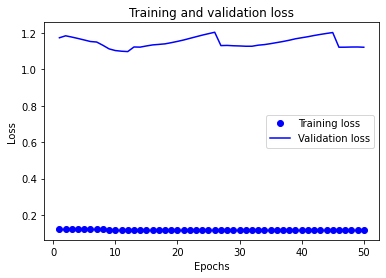

In [116]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

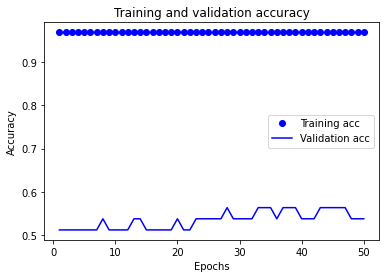

In [112]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#data가 너무 부족해서, 과적합 문제가 발생하는 듯 하다. 우선 1개년치마다 약 5개의 신문기사 데이터를 모아서 활용해야함
#라쏘, 릿지와 같은 규제화 방법을 사용한다. 그 방법은..?
#모델이 복잡하진 않다. 애초에 feature가 2개이기 때문. 모델 층도 많지 않음.

# 데이터 수를 늘려서 다시 도전

반도체 기사 데이터: 06.6.26~20.04.01
반도체 ETF 주가 데이터: 2006.06.27~21.04.02

In [1]:
import pandas as pd
import time
import numpy as np
from eunjeon import Mecab

In [2]:
mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic')

In [11]:
df = pd.read_excel("반도체20210426.xlsx", index_col = 1)
df = df.drop(df.columns[0], axis=1)
df

,Title,Content
Date,,
2020.04.01,"삼성전자 직원 2명, 또 브라질 출장 뒤 코로나 양성",삼성전자의 브라질 마나우스 사업장 자료사진. 사진 삼성전자 삼성전자 직원 두 명...
2020.04.01,지난해 상장사 순이익 반토막…올해는 코로나19 탓에 더 암울,지난해 유가증권(코스피) 시장 상장사들이 거둔 순이익이 2018년의 '반 토막' 수...
2020.04.01,코로나 19 여파로 한달 만에 다시 꺾인 수출…“선방했지만 앞으로가 더 문제”,지난달 수출이 전년 대비 0.2% 줄었다. 지난 2월 15개월 만에 상승 전환했지만...
2020.04.01,[속보] 3월 수출 전년 대비 0.2% 감소 ..일평균 수출 -6.4%,부산 남구 감만부두와 신선대 부두에 컨테이너들이 가득 쌓여 있다. 송봉근 기자. ...
2020.04.01,삼성 16개 계열사 작년 영업이익 반토막,삼성그룹 계열 상장사들의 지난해 영업이익이 전년의 절반 수준으로 줄었다. 주요 경영...
...,...,...
2006.06.26,"전경련, 3분기 채산성 조사 … 조선은 좋아질 듯",전업종 먹구름 3분기에는 환율 등의 영향으로 조선을 제외한 대부분 업종의 채산성이 ...
2006.06.26,지수 하락 하루만에 다시 반등,지수가 하락 하루만에 다시 반등해 1240선에 다가섰다. 이번주 예정된 미연방공개...
2006.06.26,코스피 지수 이틀 연속 하락,코스피 지수가 이틀 연속 하락하고 있다. 지난 주말 미 증시 약세 소식에도 불구하고...


In [12]:
start = time.time()

content = list(df['Content'])
nouns = [] #각 기사 별 단어 모음 하나 하나를 원소로 갖는 리스트

for s in content:
    noun = mecab.nouns(s)
    nouns.append(noun)
len(nouns)



#전체 명사들 모음
all_nouns = []
for i in range(len(nouns)):
    all_nouns.extend(nouns[i])
all_nouns = set(all_nouns) #겹치는 것들 삭제
all_nouns = list(all_nouns) #겹치지 않은 유일한 명사 리스트

print(time.time() - start)

44.02134108543396


In [13]:
start = time.time() #시작
word_frequency = []
for k in range(len(all_nouns)): #전체 유일명사들
    word_f = 0
    for i in range(len(nouns)): #전체 기사들 훑기
        if all_nouns[k] in nouns[i]: #만일 유일 단어 x가 특정 기사 내에 포함되면
            word_f += 1
    word_frequency.append(word_f) #각 유일단어들의 빈도수를 word_frequency list에 저장

print(time.time() - start)

4510.673974275589


In [14]:
#빈도수 평균 계산 위해 시리즈
frequency = pd.Series(word_frequency)
mean = frequency.mean() #전체 단어 빈도수의 평균

df['nouns'] = nouns #기사 데이터에 체언 열 생성

word_n_frequency = [] 
for i in range(len(all_nouns)):
    x = (all_nouns[i], word_frequency[i])
    word_n_frequency.append(x)
    
    
#빈도수 평균이 mean일 때 그 mean보다 큰 단어들이 1차 감성사전 후보 단어
candidate_word = []
for i in range(len(word_n_frequency)):
    if word_n_frequency[i][1] >= mean:
        candidate_word.append(word_n_frequency[i])

In [17]:
df2 = pd.read_csv('091160_반도체.csv', encoding='euc-kr', index_col = 0)

#아래의 작업을 해준 이유는 21년 4월 2일은 1일로부터 주가가 상승해서 1인데
#NSP(j)는 결국 이 기사가 떠서 그 다음날에 주가가 올랐다면 1을 주는거기때문에
#그 다음날 등락여부를 모르는 4월2일에는 결측치를 주고, 4월 1일부터 등락 라벨링이 가능함
#근데 처음에 데이터 정리할 때 어제보다 오늘 올랐다면 1을 주는 식으로 해놔서 한 번 수정했음
x = list(df2['등락'])
del x[-1]
x.insert(0, np.nan)
df2.drop('등락', axis=1)
df2['등락'] = x 

In [18]:
#[날짜, 제목, 기사, 형태소분석결과, 그 익일의 주가 등락]을 columns로 갖는 total dataframe
total = pd.merge(df, df2['등락'], how='inner', left_index=True, right_index=True) #둘 인덱스 겹치는 것만 합쳐주기
#total.dropna(inplace=True) #ETF 데이터가 뉴스기사보다 더 많아서 
total = total.sort_index(ascending=False) #최근 날짜부터 보려고
total

,Title,Content,nouns,등락
2020.04.01,삼성 16개 계열사 작년 영업이익 반토막,삼성그룹 계열 상장사들의 지난해 영업이익이 전년의 절반 수준으로 줄었다. 주요 경영...,"[삼성그룹, 계열, 상, 장사, 지난해, 영업, 이익, 전년, 절반, 수준, 주요,...",1.0
2020.04.01,[속보] 3월 수출 전년 대비 0.2% 감소 ..일평균 수출 -6.4%,부산 남구 감만부두와 신선대 부두에 컨테이너들이 가득 쌓여 있다. 송봉근 기자. ...,"[부산, 남구, 감만, 부두, 신선대, 부두, 컨테이너, 송봉근, 기자, 월, 수출...",1.0
2020.04.01,코로나 19 여파로 한달 만에 다시 꺾인 수출…“선방했지만 앞으로가 더 문제”,지난달 수출이 전년 대비 0.2% 줄었다. 지난 2월 15개월 만에 상승 전환했지만...,"[지난달, 수출, 전년, 대비, 월, 개월, 만, 상승, 전환, 달, 만, 뒷걸음질...",1.0
2020.04.01,지난해 상장사 순이익 반토막…올해는 코로나19 탓에 더 암울,지난해 유가증권(코스피) 시장 상장사들이 거둔 순이익이 2018년의 '반 토막' 수...,"[지난해, 유가증권, 코스피, 시장, 상, 장사, 순이익, 년, 토막, 수준, 것,...",1.0
2020.04.01,"삼성전자 직원 2명, 또 브라질 출장 뒤 코로나 양성",삼성전자의 브라질 마나우스 사업장 자료사진. 사진 삼성전자 삼성전자 직원 두 명...,"[삼성전자, 브라질, 마나우스, 사업장, 자료, 사진, 사진, 삼성전자, 삼성전자,...",1.0
...,...,...,...,...
2006.06.28,증시 사흘만에 하락세로,코스피 지수가 사흘만에 하락세로 돌아섰다. 예상보다 호전된 경제지표로 금리인상 가능...,"[코스피, 지수, 사흘, 만, 하락세, 예상, 호전, 경제, 지표, 금리, 인상, ...",1.0
2006.06.28,중소기업 과장 평균연봉 3189만원,중소기업에서 일하는 과장급 직원의 평균 연봉은 3189만원인 것으로 집계됐다. 취업...,"[중소기업, 일, 과장, 급, 직원, 평균, 연봉, 만, 원, 것, 집계, 취업, ...",1.0
2006.06.27,[기획] 물거품 '테마주 신화',코스닥 시장은 지난 10년간 각종 테마에 휩쓸리며 부침을 거듭했다. 시대의 트렌드나...,"[코스닥, 시장, 년, 간, 각종, 테마, 부침, 시대, 트렌드, 유행, 등장, 테...",0.0
2006.06.27,"삼성전자, 2기가 원낸드 개발",삼성전자는 60나노 공정을 적용한 2기가비트(Gb) 용량의 복합 메모리 반도체인 원...,"[삼성전자, 나노, 공정, 적용, 기, 비트, 용량, 복합, 메모리, 반도체, 원낸...",0.0


In [19]:
start = time.time()
#감성사전 후보 단어에 한해서 진행
positive_i = [] #전체 긍정값 리스트
for i in range(len(candidate_word)):
    positive = 0 #긍정값 초기화
    for k in range(len(total)):
        if candidate_word[i][0] in total['nouns'][k]: #만일 단어 i가 기사 k에 있다면
            word_ij = 1 
        else:
            word_ij = 0 
        
        word_NSP = word_ij * total['등락'][k]
        
        positive += word_NSP #기사 전체에 대해 단어 i의 긍정값 누적 sum
        
    positive_i.append(positive)
        
print(time.time() - start)

380.4182696342468


In [20]:
P_i = []
for i in range(len(positive_i)):
    p_i = positive_i[i] / candidate_word[i][1]
    P_i.append(p_i)
    
sent_dic = []
for i in range(len(P_i)):
    sent = (candidate_word[i][0], P_i[i])
    sent_dic.append(sent)

In [21]:
sent_dic = pd.DataFrame(sent_dic)
sent_dic.columns=['단어', '긍정지수']
sent_dic = sent_dic.sort_values(by='긍정지수', ascending=False)

#감성사전을 갖고 있다면 이를 활용해 예측해야지
# 기사 i의 긍정지수: 
# 기사 i에 감성 사전 내 단어가 들어간 개수 sum_j match(i,j)
# match(i,j) * P(j) = 그 기사에 들어간 감성 사전 단어들에 대한 긍정값을 더해줌

#첫 번째 기사에 대해서
result = []
result_p = []
for k in range(len(total)):
    res = 0
    res_p = 0
    for i in range(len(sent_dic)): #감성사전 내에 대해
        if sent_dic['단어'][i] in total['nouns'][k]:
            res += 1
            res_p += sent_dic['긍정지수'][i]
    result.append(res)
    result_p.append(res_p)
        
        
print(result) #빈도수
print(result_p) #긍정값

[98, 97, 224, 193, 62, 135, 131, 122, 258, 130, 98, 97, 256, 618, 115, 383, 196, 739, 196, 94, 196, 165, 121, 199, 55, 116, 123, 137, 218, 193, 181, 217, 152, 298, 288, 106, 232, 267, 72, 248, 89, 176, 247, 225, 274, 201, 161, 165, 141, 307, 165, 189, 174, 132, 65, 222, 231, 124, 112, 231, 212, 211, 201, 173, 263, 101, 230, 75, 162, 124, 169, 64, 69, 147, 68, 93, 222, 199, 191, 148, 282, 265, 183, 130, 168, 150, 145, 187, 112, 69, 157, 119, 241, 312, 133, 211, 111, 149, 212, 107, 184, 127, 176, 287, 141, 126, 196, 114, 125, 241, 212, 287, 56, 216, 81, 188, 166, 104, 162, 114, 84, 155, 202, 133, 150, 159, 142, 67, 141, 139, 187, 192, 142, 193, 180, 213, 49, 164, 89, 75, 177, 148, 235, 127, 209, 203, 228, 99, 144, 90, 88, 98, 164, 29, 165, 240, 95, 132, 65, 134, 164, 226, 122, 240, 238, 209, 147, 127, 111, 72, 112, 115, 74, 164, 128, 190, 135, 200, 102, 238, 139, 85, 106, 121, 96, 112, 132, 203, 151, 139, 152, 65, 115, 105, 166, 192, 144, 196, 106, 109, 128, 160, 163, 190, 155, 532, 136,

In [22]:
total['기사빈도수'] = result
total['기사긍정지수'] = result_p

In [23]:
article_p = total['기사긍정지수'].groupby(total.index).mean().sort_index(ascending=False) #일별 긍정지수
article_f = total['기사빈도수'].groupby(total.index).mean().sort_index(ascending=False) #일별 기사빈도수

article = pd.concat([article_p, article_f], axis=1) #이걸 데이터프레임으로
article = pd.concat([article, df2['등락']],axis=1) #Input data로서 정리

article.dropna(inplace=True) #혹시 모를 결측치 정리

article.to_excel("건설result.xlsx")

## 예측 모델 만들기

In [24]:
#input위해 데이터 scaling
article['기사긍정지수'] = article['기사긍정지수'] / article['기사긍정지수'].max() 
article['기사빈도수'] = article['기사빈도수'] / article['기사빈도수'].max()
article

,기사긍정지수,기사빈도수,등락
2020.04.01,0.246984,0.249630,1.0
2020.03.31,0.236994,0.239506,0.0
2020.03.30,0.356992,0.359259,1.0
2020.03.27,0.276012,0.278395,1.0
2020.03.26,0.603920,0.607407,1.0
...,...,...,...
2006.07.04,0.246958,0.250000,1.0
2006.07.03,0.200161,0.203704,0.0
2006.06.29,0.191000,0.192130,1.0
2006.06.28,0.112731,0.112963,1.0


In [25]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [26]:
x_data = []
for i in range(len(article)):
    x = [article['기사긍정지수'][i], article['기사빈도수'][i]]
    x_data.append(x)
    
y_data = list(article['등락'])


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

encoder = OneHotEncoder(sparse=False)
encoder.fit(x_train)  # data에 나타난 유일한 값을 찾는다.
X_binned = encoder.transform(x_train)  # 원-핫-인코딩으로 변환

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [34]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2690,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [36]:
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
x_val = X_binned[:39]
partial_x_train = X_binned[39:]
y_val = y_train[:39]
partial_y_train = y_train[39:]

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=4,
                    validation_data=(x_val, y_val))

Epoch 1/50
468/468 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.4945 - val_loss: 0.6974 - val_accuracy: 0.4872
Epoch 2/50
468/468 [==============================] - 0s 748us/step - loss: 0.6912 - accuracy: 0.5174 - val_loss: 0.7146 - val_accuracy: 0.4359
Epoch 3/50
468/468 [==============================] - 0s 704us/step - loss: 0.5646 - accuracy: 0.7818 - val_loss: 0.9021 - val_accuracy: 0.4359
Epoch 4/50
468/468 [==============================] - 0s 707us/step - loss: 0.3372 - accuracy: 0.8715 - val_loss: 1.1383 - val_accuracy: 0.4359
Epoch 5/50
468/468 [==============================] - 0s 727us/step - loss: 0.2590 - accuracy: 0.9100 - val_loss: 1.1080 - val_accuracy: 0.4872
Epoch 6/50
468/468 [==============================] - 0s 706us/step - loss: 0.1742 - accuracy: 0.9421 - val_loss: 1.3183 - val_accuracy: 0.4359
Epoch 7/50
468/468 [==============================] - 0s 745us/step - loss: 0.1487 - accuracy: 0.9453 - val_loss: 1.2720 - val_accuracy: 0

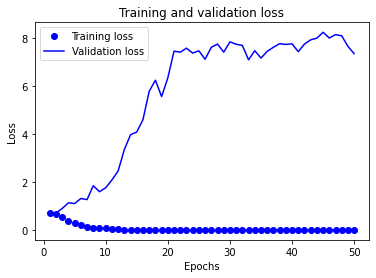

In [38]:
history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

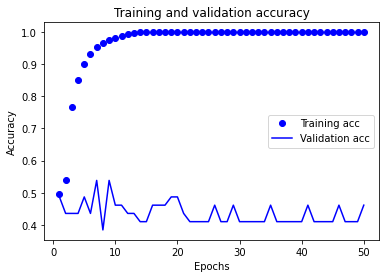

In [39]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()